In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib
           v0      alpha0        x0        y0     g         m     x_end  \
0    0.675537   32.540242 -3.235171  0.004892 -9.81  9.881297 -0.157922   
1    0.802334   59.931540 -4.021879  0.007874 -9.81  6.071767 -0.245937   
2    0.910872   84.603937  4.229850  0.002136 -9.81  8.272250  0.067829   
3    0.927630  137.834671 -4.028750  0.003303 -9.81  8.565407  0.365783   
4    0.066069  157.688919 -1.683056  0.007054 -9.81  1.368555  0.004173   
..        ...         ...       ...       ...   ...       ...       ...   
495  0.474502   85.455060  4.786913  0.002013 -9.81  5.805197  0.018092   
496  0.911895   27.727894 -2.597305  0.006428 -9.81  6.050997 -0.208918   
497  0.519584   23.132134 -2.729882  0.000815 -9.81  6.604074 -0.059068   
498  0.157562  111.441853  2.739657  0.004398 -9.81  5.039887 -0.007640   
499  0.822762  121.924261  3.854447  0.007168 -9.81  4.633316 -0.254873   

            t  
0    0.085716  
1   

/home/user/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<AxesSubplot:xlabel='v0', ylabel='x_end'>

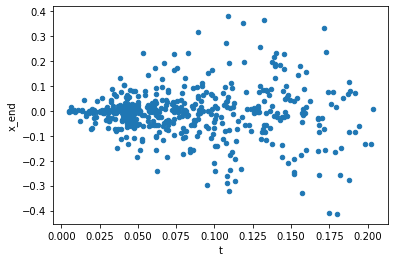

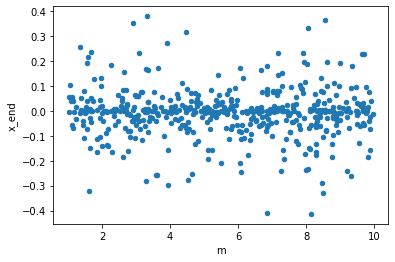

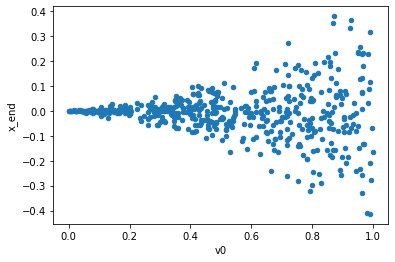

In [2]:
# %load Building\ a\ dataset.py
#----------------------------------------
# Import Environment
#----------------------------------------
import pandas as pd
import random
import numpy as np
from scipy.integrate import odeint

#--------#!/usr/bin/env python
# coding: utf-8

# In[1]:


get_ipython().run_line_magic('pylab', 'inline')


# In[21]:


# %load Building\ a\ dataset.py
#----------------------------------------
# Import Environment
#----------------------------------------
import pandas as pd
import random
import numpy as np
from scipy.integrate import odeint

#----------------------------------------
# Setting projectile values
#----------------------------------------
'''Creating a dictionary with all the features.
Each feature directs to a random array of 500 elements.'''
N = 500
feature_dict = dict(v0 = [random.uniform(0,1) for i in range(N)],   # initial velocity [m/s]
                    alpha0 = [random.uniform(0,189) for i in range(N)], # angle of v0 compared to horizon [deg]
                    x0 = [random.uniform(-5,5) for i in range(N)],  # initial horizontal positioning [m]
                    y0 = [random.uniform(0.0,0.01) for i in range(N)],    # initial height relative to ground [m], therefore y0>=0
                    g = [-9.81 for i in range(N)],                       # gravitational acceleration [m/s2]
                    m = [random.uniform(1,10) for i in range(N)],# projectile's mass [kg]
                    )

#----------------------------------------
# Calculate landing location
#----------------------------------------

# Vx = horizontal velocity component [m/s]
# Vy0 = initial horizontal velocity component [m/s]
# h = max distance from the ground [m]
# t = total time of flight [s]
# x_end = landing point [m]

# Calculate: Vx = V0 * cos(alpha), Vy0 = V0 * sin(alpha)
cos_alpha = np.cos( np.deg2rad(feature_dict['alpha0']) )
sin_alpha = np.sin( np.deg2rad(feature_dict['alpha0']) )
Vx,Vy0 = [],[]

for i,V0 in enumerate(feature_dict['v0']):
    Vx.append(V0 * cos_alpha[i])
    Vy0.append(V0 * sin_alpha[i])

# solve: 0.5g*t^2+Vy0*t+y0=0
t = []
for i in range(N):
    coeff = [0.5*feature_dict['g'][i], Vy0[i], feature_dict['y0'][i]]
    options = np.sort(np.roots(coeff))
    # print(options)# the negative is first, the positive is second. 
    t.append(0) if options[1] < 0 else t.append(options[1])

# Calculate: x_end = x0 + Vx * t, and add as target feature to dict
'''CHECK! Is it a problem that there's no two targets (x_end) alike?'''
x_end, mult = [], np.multiply(Vx, t).tolist()
for i in range(N):
    x_end.append( feature_dict['x0'][i] * mult[i])

feature_dict["x_end"] = x_end
feature_dict['t'] = t

df = pd.DataFrame(data = feature_dict)

print(df)


# In[28]:


df.plot.scatter(x='t',y='x_end')


# In[29]:


df.plot.scatter(x='m',y='x_end')


# In[31]:


df.plot.scatter(x='v0',y='x_end')


<AxesSubplot:xlabel='t', ylabel='x_end'>

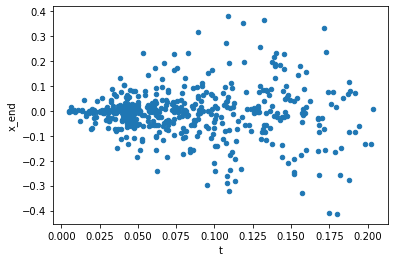

In [3]:
df.plot.scatter(x='t',y='x_end')

<AxesSubplot:xlabel='m', ylabel='x_end'>

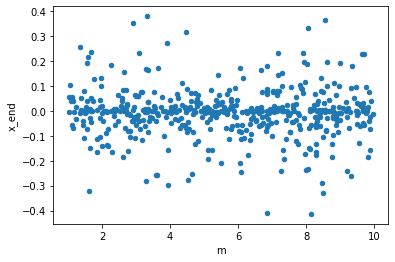

In [4]:
df.plot.scatter(x='m',y='x_end')

<AxesSubplot:xlabel='v0', ylabel='x_end'>

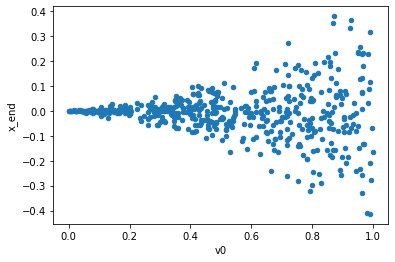

In [5]:
df.plot.scatter(x='v0',y='x_end')